<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Ingeniería de características & funciones</h1>
  <p></p>
</div>

In [105]:
from pickle import load, dump
#%matplotlib auto
from seaborn import pairplot
import matplotlib.pyplot as plt
#from seaborn import set
from seaborn import heatmap
from pandas import Categorical
from numpy import mean,log2,std
import seaborn as sns
import matplotlib
import numpy as np
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
#set(style="ticks")

In [150]:
#Variables categóricas y target
cat_col = [
 'RainToday',
 'WindDir3pm',
 'WindDir9am',
 'Location',
 'WindGustDir']
label = 'RainTomorrow' 

### Cargar datos 

In [107]:
# Load data (deserialize)
with open('Data/data_processing.pickle', 'rb') as handle:
    df = load(handle)

In [108]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [109]:
df.dtypes

Date             datetime64[ns]
Location                   int8
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir                int8
WindGustSpeed           float64
WindDir9am                 int8
WindDir3pm                 int8
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                  int8
RainTomorrow               int8
dtype: object

### Reset indices del dataframe

In [110]:
df.reset_index(drop=True, inplace=True)

### Variable Date


Las especificaciones técnicas índican que los datos contiene un registro por día en diferentes locaciones de Australía, análizaremos estas premisas

#### Fecha máxima en los datos

In [111]:
max(df['Date'])

Timestamp('2017-06-25 00:00:00')

#### Fecha mínima en los datos

In [112]:
min(df['Date'])

Timestamp('2007-11-01 00:00:00')

Contar valores únicos de la variable `Date`

In [113]:
df['Date'].value_counts()

2010-06-09    25
2010-11-30    25
2009-01-25    25
2010-04-16    25
2009-04-07    25
              ..
2008-01-03     1
2008-06-18     1
2008-03-08     1
2007-11-27     1
2008-04-10     1
Name: Date, Length: 3416, dtype: int64

Existe más de un registro para algunas fechas

Ahora vemos como se ven los datos al visualizar la fecha junto a la ubicación y la variable de clase

In [114]:
df.sort_values(by=['Date'])[['Date','RainTomorrow','Location']].tail(18)

,Date,RainTomorrow,Location
51134,2017-06-24,0,7
20148,2017-06-24,0,9
29233,2017-06-24,0,23
10849,2017-06-24,0,20
7979,2017-06-24,0,19
32186,2017-06-24,0,1
46169,2017-06-24,0,16
22046,2017-06-24,0,8
49194,2017-06-24,0,15
56419,2017-06-24,0,6


Las fechas estan duplicadas debido a que existen registro por cada ubicación geoagráfica

In [115]:
df[df.Date == '2017-06-25']

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
7980,2017-06-25,19,7.6,19.3,0.0,3.4,9.4,13,35.0,13,...,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0,0
10850,2017-06-25,20,6.8,19.5,0.0,3.4,9.4,15,46.0,7,...,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,0,0
20149,2017-06-25,9,5.5,13.9,0.0,2.8,3.8,6,44.0,3,...,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,0,0
22047,2017-06-25,8,8.6,14.3,0.0,2.8,3.8,7,35.0,3,...,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,1
29234,2017-06-25,23,7.9,13.0,0.0,2.8,3.8,6,39.0,3,...,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0,0
32187,2017-06-25,1,11.0,24.2,0.0,2.2,9.8,1,20.0,11,...,68.0,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,0,0
46170,2017-06-25,16,4.9,16.8,0.0,1.6,7.9,0,39.0,0,...,69.0,44.0,1028.5,1026.0,1.0,3.0,12.0,16.2,0,0
49195,2017-06-25,15,6.3,17.0,0.0,1.6,7.9,0,26.0,9,...,75.0,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6,0,0


In [116]:
#for i in range(10,25):
   # print(len(df['Date'].value_counts().values[df['Date'].value_counts().values>i]))

In [117]:
df['Date'].shape

(56420,)

- Nota importante : La transformaciones se basan en la suposición que cada ubicación tiene sesores idénticos y que no es necesario el tratamiento de datos porcada locación


## Transformaciones

### Separar variables

In [118]:
num_col=df.columns
num_col = set(num_col.tolist())
num_col = list(set(num_col)- set([label,'Date']))
num_col = list(set(num_col)- set(cat_col))
exc = ['Rainfall','Evaporation']
num_col = list(set(num_col)- set(exc))

### Variables númericas 

- Extraemos las variables `Rainfall` y `Evaporation` de  `num_col`, ya que tendran un tratamiento diferente.
- A las variables `Rainfall` y `Evaporation` se les aplicará una trasformación para  tratar el sesgado y ser normalizarlas (distribución)
- Las variables dentro del vector  de variables `num_col` se normalizaran con `z-score`

### Lista de columnas númericas

In [119]:

num_col

['WindGustSpeed',
 'Sunshine',
 'Cloud3pm',
 'Temp3pm',
 'Temp9am',
 'MinTemp',
 'Cloud9am',
 'MaxTemp',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity3pm',
 'Pressure9am',
 'Humidity9am',
 'Pressure3pm']

### Variables categóricas

In [120]:
cat_col

['RainToday', 'WindDir3pm', 'WindDir9am', 'Location', 'WindGustDir']

### Etiqueta | Variable de clase

In [121]:
label

'RainTomorrow'

### Variables con tratamiento especial (excluidas de las variables numéricas)

In [122]:
exc

['Rainfall', 'Evaporation']

### Rainfall y Evaporation

Obtener la grafica de bigotes y la forma de la distribución de la variable

#### Rainfall

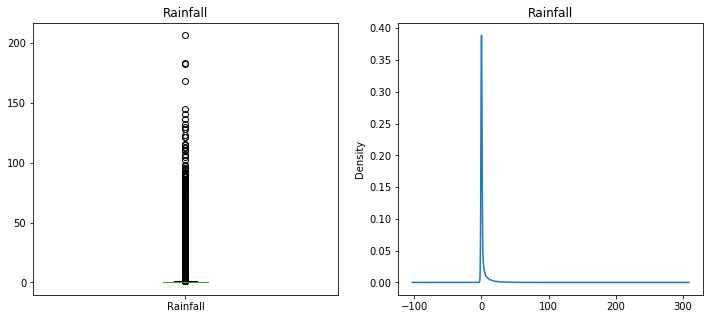

In [123]:
fig,ax = plt.subplots(nrows = 1, ncols = 2)
df.Rainfall.plot(kind = 'box',figsize = [12.0,5.0],title="Rainfall",ax = ax[0])
df.Rainfall.plot(kind = 'density',figsize = [12.0,5.0],title="Rainfall",ax = ax[1])

#### Evaporation

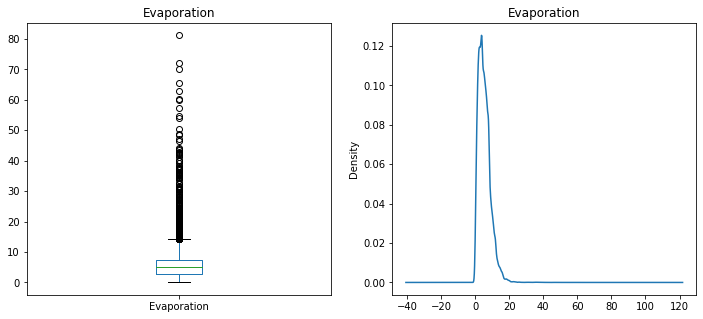

In [124]:
fig,ax = plt.subplots(nrows = 1, ncols = 2)
df.Evaporation.plot(kind = 'box',figsize = [12.0,5.0],title="Evaporation",ax = ax[0])
df.Evaporation.plot(kind = 'density',figsize = [12.0,5.0],title="Evaporation",ax = ax[1])

La mayoría de los modelos estadísticos no funcionan cuando los datos están sesgados y la razón detrás de esto es que los datos en los extremos (región de cola de las distribuciones) son datos sesgados y  básicamente funcionan como valores atípicos.

Aplicaremos la transformación logarítmica `log2(square(normalized(x))` a las variables `Rainfall` y `Evaporation`

In [125]:
df['Rainfall'] = (((log2(((df.Rainfall - mean(df.Rainfall))/std(df.Rainfall))**2))))

Text(0.5, 0, 'Rainfall')

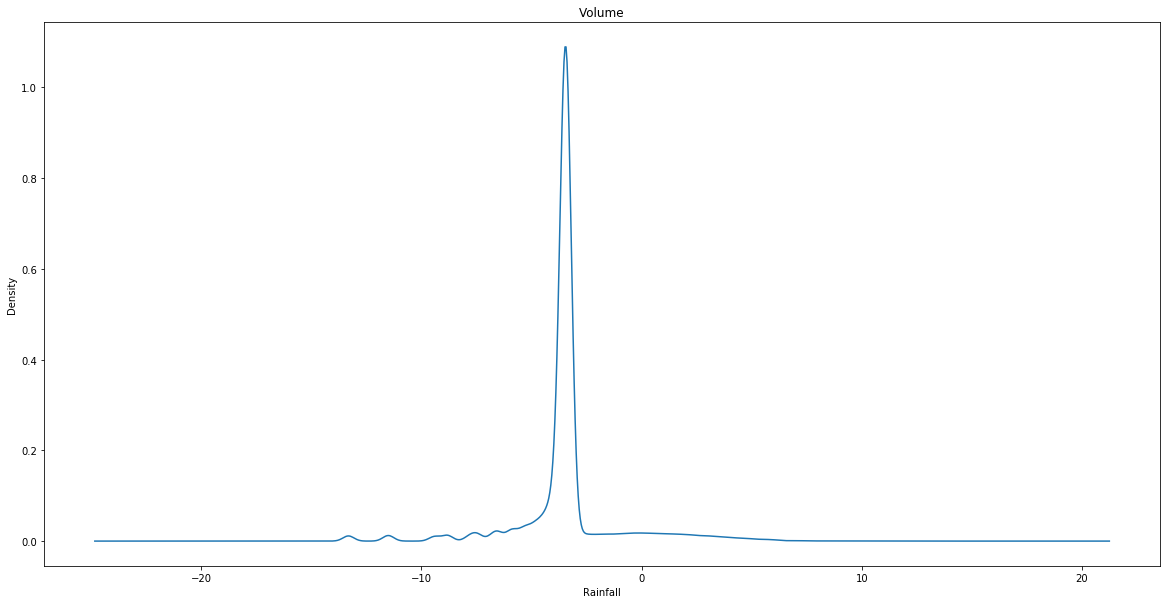

In [126]:
df.Rainfall.plot(kind='density',title="Volume").set_xlabel("Rainfall")

Text(0.5, 0, 'Valor')

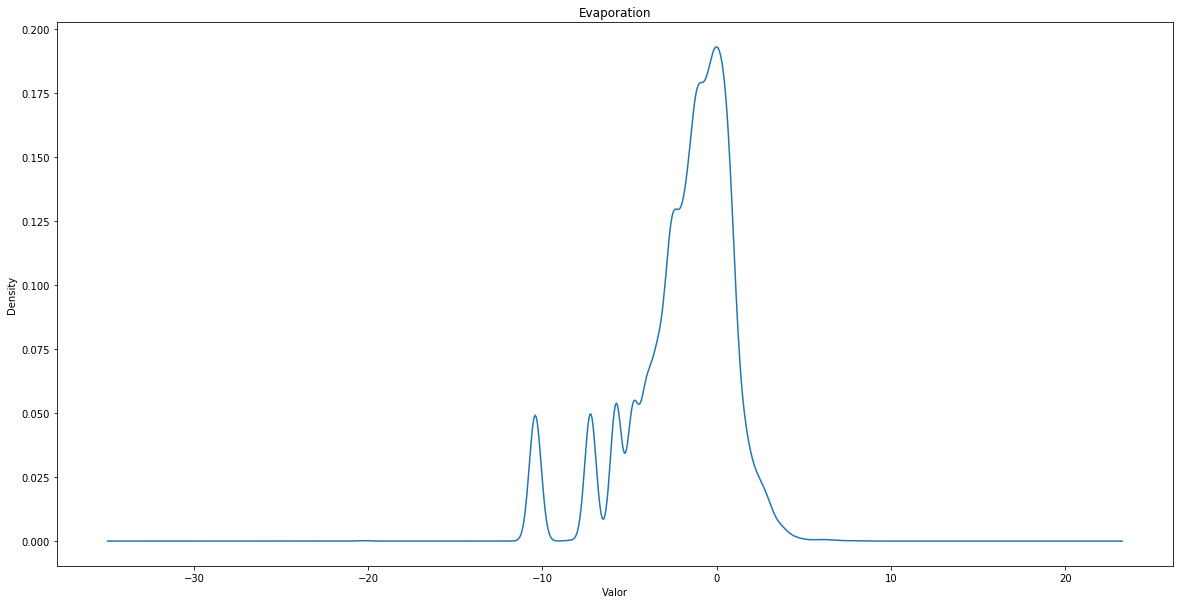

In [127]:
df['Evaporation'] = (((log2(((df.Evaporation - mean(df.Evaporation))/std(df.Evaporation))**2))))
df.Evaporation.plot(kind='density',title="Evaporation").set_xlabel("Valor")

La transformación logarítmica no arroga buenos resultados, probemos con 2 transformaciones más complejas : `PowerTransformer` y `QuantileTransformer`

In [152]:
def test_transformers(columns):
    """
    Esta función aplicar la trasformación PowerTransformer y QuantileTransformer a una matriz de datos 
    y muestra los resultados en forma gráfica
    
    input 
            columns : lista con el nombre de las columnas a las que se le aplicarán las transformaciones a dataframe 'df'
            
    output  
        Visualizació de los resultados
    
    """
    
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=5000, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f" Transformación Quantile{i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Transformación Power {i}")
        j += 3


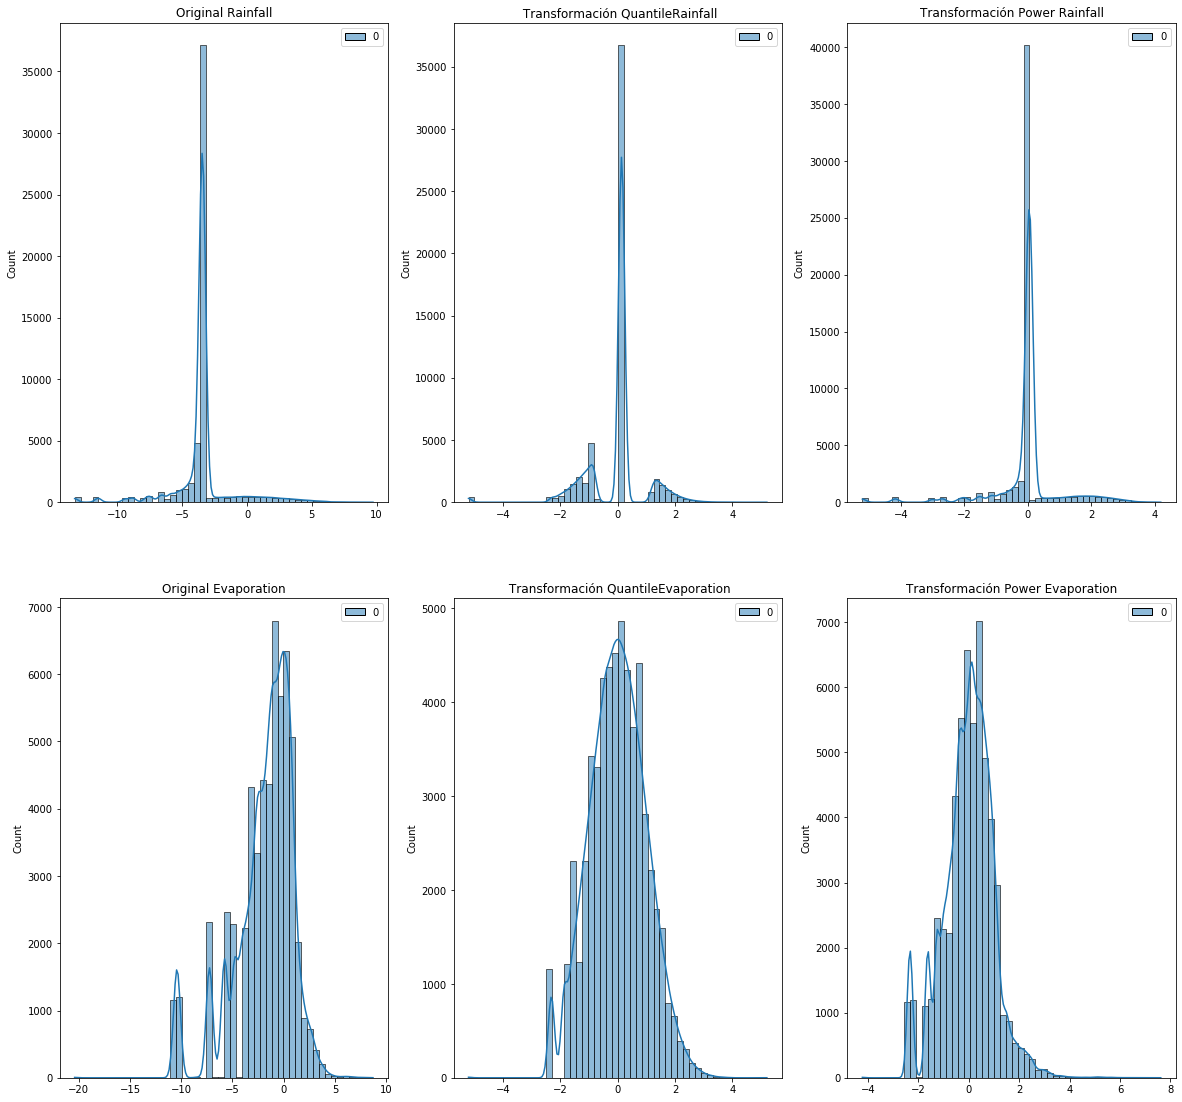

In [129]:
test_transformers(exc)

La transformación `QuantileTransformer` es la mejor opción 

### Aplicar transformación `Quantile` a las variables `Rainfall` y `Evaporation`

In [130]:
qt = QuantileTransformer(n_quantiles=5000, output_distribution='normal')
array = np.array(df['Rainfall']).reshape(-1, 1)
x = qt.fit_transform(array)

df['Rainfall']= x

qt = QuantileTransformer(n_quantiles=5000, output_distribution='normal')
array = np.array(df['Evaporation']).reshape(-1, 1)
x = qt.fit_transform(array)
df['Evaporation'] = x

### Reducir los valores extremos de las variables `Rainfall` y `Evaporation`

Después de la transformación las variables en cuestión aún presentan colas muy largas, como podemos obervar en la gráficas de distribución. Debido a esto colocaremos un techo y un piso a los datos.

In [131]:

def cap(x):
    '''
    Función que se utiliza para acotar los datos dentro de un rango [mínimo, máximo]
    
    '''
    if x>mx: x = mx
    if x<mn: x = mn
    return x


In [132]:
# Obtener los indices de los datos dentro del rango [-2.5, 2.5]
# El rango es empírico y es definido en base a la observación de las gráficas
# Nota: existen otras técnicas basadas en varianza y cuartiles para definir los rangos de normalidad 
idxs = df.loc[(df.Rainfall>-2.5) | (df.Rainfall<2.5)].index 
#obtener el máximo valor
mx = max(df.iloc[idxs].Rainfall)
#Obtener el valor mínimo
mn = min(df.iloc[idxs].Rainfall)

#Aplicar función 'cap' para definr el piso y techo a los datos y reducir el sesgo (colas largas)
df.Rainfall = df.Rainfall.apply(cap)

#### Se repite el mismo proceso para la variables `Evaporation`

In [133]:
# obtener índices
idxs = df.loc[(df.Evaporation>-4) | (df.Evaporation<4)].index

mx = max(df.iloc[idxs].Evaporation)
mn = min(df.iloc[idxs].Evaporation)

#aplicar función
df.Evaporation = df.Evaporation.apply(cap)

#### Graficar resultados

C:\Users\mcssa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcssa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcssa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

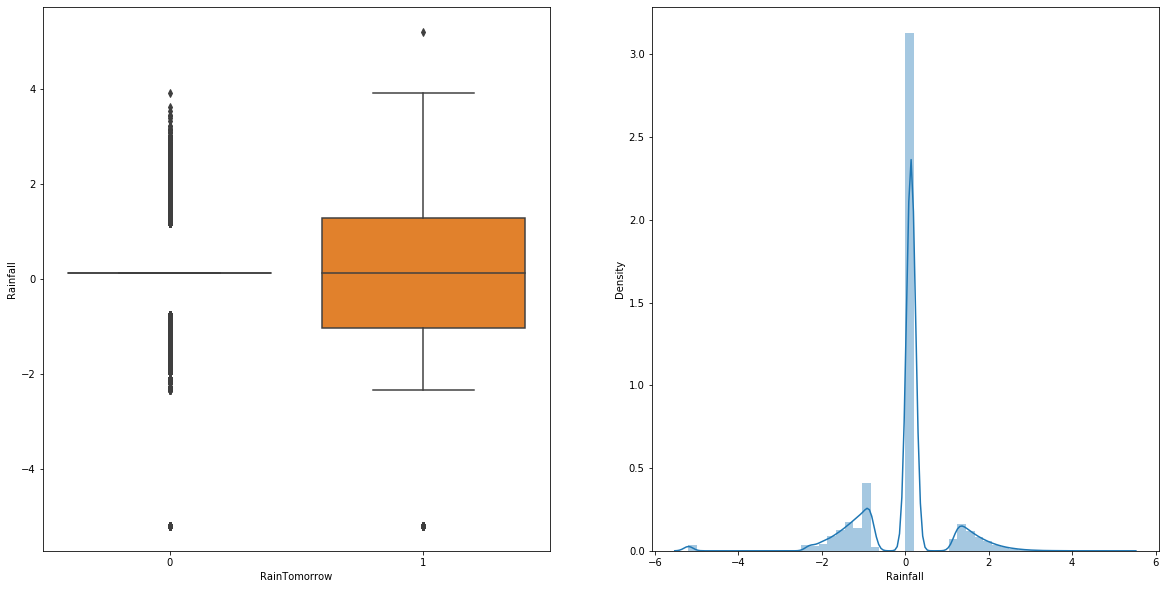

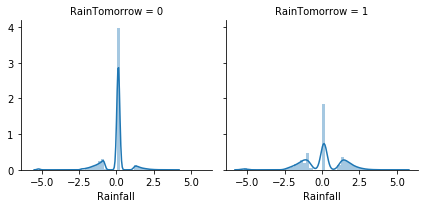

In [135]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


fig,ax = plt.subplots(nrows = 1, ncols = 2)
sns.boxplot(x = label, y = 'Rainfall',data = df,ax = ax[0])

g = sns.FacetGrid(df,col=label)
g.map(sns.distplot,"Rainfall")
sns.distplot(df['Rainfall'],ax = ax[1])


C:\Users\mcssa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcssa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mcssa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

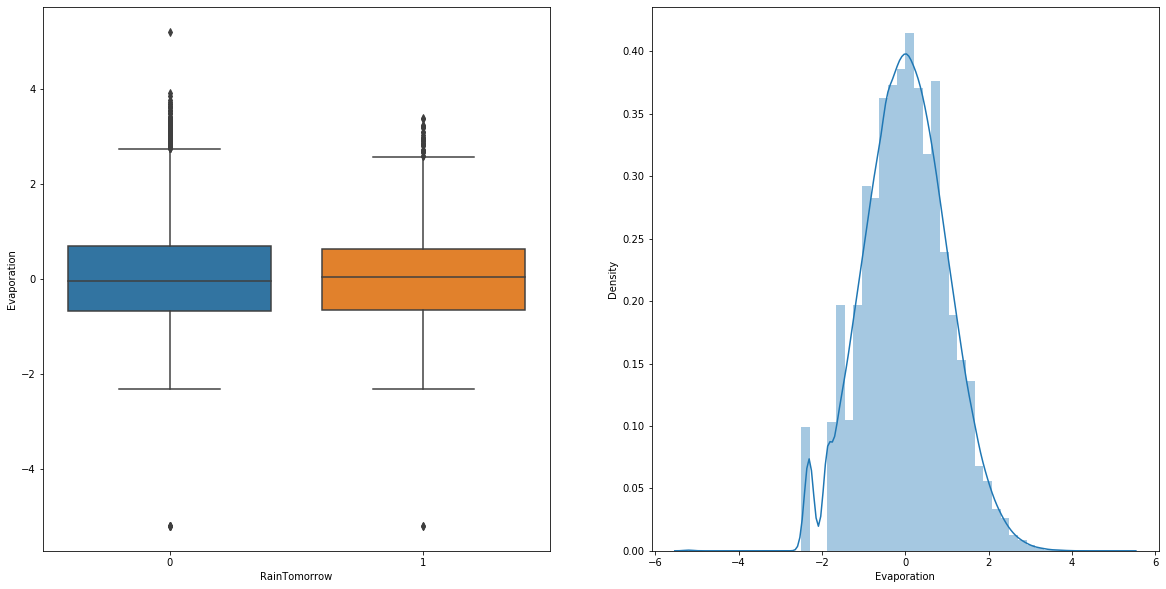

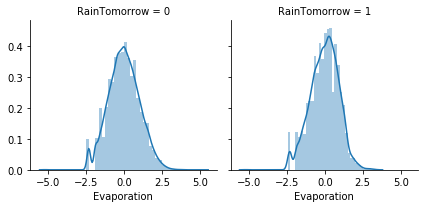

In [136]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


fig,ax = plt.subplots(nrows = 1, ncols = 2)
sns.boxplot(x = label, y = 'Evaporation',data = df,ax = ax[0])

g = sns.FacetGrid(df,col=label)
g.map(sns.distplot,"Evaporation")
sns.distplot(df['Evaporation'],ax = ax[1])


Se logra mejorar el sesgo de ambas variables, aunque la transformación funciona mejor con `Evaporation`. `Rainfall` aún sigue mostrando posibles valores atípicos en los valores asociados a la variable de clase `No`(cero) 

### Normalizar variables númericas


Se normalizan a través de un proceso de estandarización de datos: El objetivo es ajustar los datos bajo una premisa de distribución normal. Tiene la ventaja de que no es "desbordado" por los nuevos valores, a diferencia de la normalizacipon por escalamiento (Mini-Max). Es la opción más recomendada debido a que los datos probienen de sesores físicos 

La transformación es:

$$X = \frac {X-\mu }{\sigma }$$



No es necesario indicar el mismo ajuste para cada atributo, por lo que las variables `Evaporation` y `Rainfall` se normalizan de forma diferente.  No hay problema si el Atributo `A` se ajusta de -1 a +1 y el Atributo `B` se ajusta de -3 a +3. Sin embargo, el modelo tendrá problemas si el Atributo `B` se escala de 5,000 a 100,000.

In [137]:
from scipy.stats import zscore
df[num_col] = df[num_col].apply(zscore)

In [138]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,4,0.691208,1.575298,0.135801,1.655518,1.214537,11,0.534126,1,...,-2.477924,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,0,0
1,2009-01-02,4,0.769131,0.671504,0.135801,2.099110,1.400800,8,-0.290764,10,...,-1.937767,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,0,0
2,2009-01-04,4,0.924976,1.919600,0.135801,1.360617,0.762183,5,0.384146,5,...,-1.289578,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,0,0
3,2009-01-05,4,1.314588,2.034368,0.135801,1.528352,1.187928,14,-0.740704,14,...,-1.559657,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,0,0
4,2009-01-06,4,1.673032,2.407362,0.135801,1.490750,0.176784,14,-0.440744,7,...,-2.531940,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,6,0.909391,1.317071,0.135801,-1.318198,0.868619,1,-0.440744,9,...,-0.155248,-0.871521,-0.483335,-0.625191,-1.516445,-1.256603,0.958451,1.402719,0,0
56416,2017-06-21,6,1.205497,1.202303,0.135801,-0.178193,0.230002,0,-0.290764,9,...,-0.533358,-1.069571,-0.382022,-0.523311,0.986113,-1.634357,1.004127,1.358837,0,0
56417,2017-06-22,6,1.127574,1.230995,0.135801,-2.311520,0.868619,0,-0.590724,0,...,-1.073515,-1.317135,-0.280710,-0.435985,-1.516445,-1.634357,1.004127,1.373465,0,0
56418,2017-06-23,6,0.940560,1.087536,0.135801,-1.096055,0.762183,2,-1.115654,9,...,-0.209264,0.415808,-0.338603,-0.596082,-1.158937,-1.256603,1.004127,0.949270,0,0


### Transformación de variables categóricas

La primera opción es una codificación de etiqueta (`Label encoding`), es decir varibales categoricas ordinales. Observaremos como se comportan en el modelado  y lo compararemos con una códificación `one hot encoder`

In [149]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])

#pd.get_dummies(df, columns = ["Location"], drop_first = True)

In [140]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-01,4,0.691208,1.575298,0.135801,1.655518,1.214537,11,0.534126,1,...,-2.477924,-1.812261,-1.583303,-1.513002,-0.801428,0.254411,1.278186,1.563621,0,0
1,2009-01-02,4,0.769131,0.671504,0.135801,2.099110,1.400800,8,-0.290764,10,...,-1.937767,-2.059824,-0.628068,-0.392322,-1.158937,-1.256603,0.318980,0.627467,0,0
2,2009-01-04,4,0.924976,1.919600,0.135801,1.360617,0.762183,5,0.384146,5,...,-1.289578,-1.366647,-0.714907,-0.814396,-1.158937,0.632165,1.597921,1.783032,0,0
3,2009-01-05,4,1.314588,2.034368,0.135801,1.528352,1.187928,14,-0.740704,14,...,-1.559657,-1.366647,-0.657014,-0.828951,-1.158937,0.254411,1.658823,1.885424,0,0
4,2009-01-06,4,1.673032,2.407362,0.135801,1.490750,0.176784,14,-0.440744,7,...,-2.531940,-1.713236,-0.946479,-1.076373,-1.158937,0.632165,2.343970,2.177972,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,6,0.909391,1.317071,0.135801,-1.318198,0.868619,1,-0.440744,9,...,-0.155248,-0.871521,-0.483335,-0.625191,-1.516445,-1.256603,0.958451,1.402719,0,0
56416,2017-06-21,6,1.205497,1.202303,0.135801,-0.178193,0.230002,0,-0.290764,9,...,-0.533358,-1.069571,-0.382022,-0.523311,0.986113,-1.634357,1.004127,1.358837,0,0
56417,2017-06-22,6,1.127574,1.230995,0.135801,-2.311520,0.868619,0,-0.590724,0,...,-1.073515,-1.317135,-0.280710,-0.435985,-1.516445,-1.634357,1.004127,1.373465,0,0
56418,2017-06-23,6,0.940560,1.087536,0.135801,-1.096055,0.762183,2,-1.115654,9,...,-0.209264,0.415808,-0.338603,-0.596082,-1.158937,-1.256603,1.004127,0.949270,0,0


### Agregar variables

#### Variable Date

In [153]:
# agregar dos variable más a los datos : mes y dia
df['month'] = df.Date.dt.month
df['day'] = df.Date.dt.day

#### Codificación de características cíclicas

Existen meses que son mas propensos a que lluevaa de acuerdo a la estación del año, este tipo de caractéristicas son cíclicas ya que se repiten cada año. Por esto motivo podemos agregarla dicha información a los datos con los que aprenderá el modelo, sin embargo deben de tener la representación correcta.

Los datos representados de forma categorica ordinal (discreta) para la variable `month` se ven de la siguiente forma:

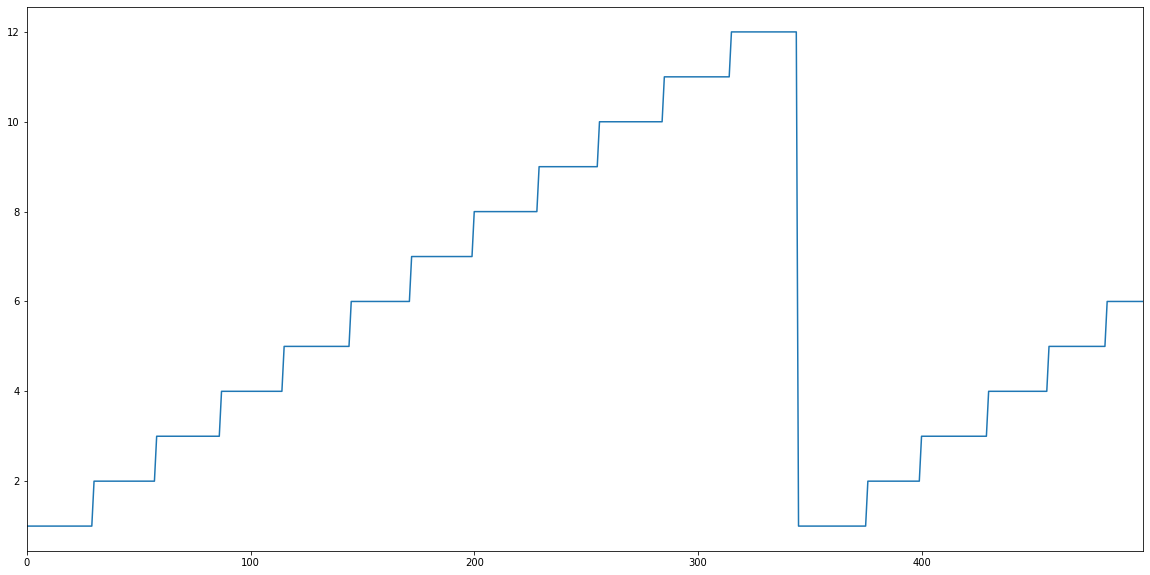

In [142]:
ax = df['month'].head(500).plot()



Un método común para codificar datos cíclicos es transformar los datos en dos dimensiones utilizando una transformación seno y conseno

Podemos hacer eso usando las siguientes transformaciones:

In [154]:
def encode(data, col, max_val):
    """
    Aplicar la transformación seno y coseno a un vetor
    
    input 
            data:
            col:
            max_val:
    
    output
            data
    """
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [144]:
df = encode(df, 'month', 12)
df = encode(df, 'day', 365)

Ahora la diferencia absoluta entre el mes 11, el mes 12 (diciembre) y el mes 1 (enero) es la misma.
Si graficamos ambas características en dos dimensiones, obtenemos lo siguiente:


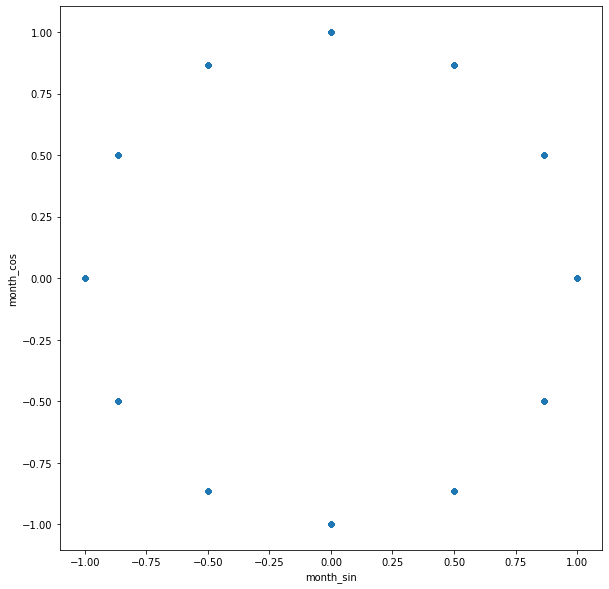

In [145]:
ax = df.head(1000).plot.scatter('month_sin', 'month_cos').set_aspect('equal')

### Alamcenamiento de datos

In [146]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,month,day,month_sin,month_cos,day_sin,day_cos
0,2009-01-01,4,0.691208,1.575298,0.135801,1.655518,1.214537,11,0.534126,1,...,1.278186,1.563621,0,0,1,1,5.000000e-01,0.866025,0.017213,0.999852
1,2009-01-02,4,0.769131,0.671504,0.135801,2.099110,1.400800,8,-0.290764,10,...,0.318980,0.627467,0,0,1,2,5.000000e-01,0.866025,0.034422,0.999407
2,2009-01-04,4,0.924976,1.919600,0.135801,1.360617,0.762183,5,0.384146,5,...,1.597921,1.783032,0,0,1,4,5.000000e-01,0.866025,0.068802,0.997630
3,2009-01-05,4,1.314588,2.034368,0.135801,1.528352,1.187928,14,-0.740704,14,...,1.658823,1.885424,0,0,1,5,5.000000e-01,0.866025,0.085965,0.996298
4,2009-01-06,4,1.673032,2.407362,0.135801,1.490750,0.176784,14,-0.440744,7,...,2.343970,2.177972,0,0,1,6,5.000000e-01,0.866025,0.103102,0.994671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,2017-06-20,6,0.909391,1.317071,0.135801,-1.318198,0.868619,1,-0.440744,9,...,0.958451,1.402719,0,0,6,20,1.224647e-16,-1.000000,0.337523,0.941317
56416,2017-06-21,6,1.205497,1.202303,0.135801,-0.178193,0.230002,0,-0.290764,9,...,1.004127,1.358837,0,0,6,21,1.224647e-16,-1.000000,0.353676,0.935368
56417,2017-06-22,6,1.127574,1.230995,0.135801,-2.311520,0.868619,0,-0.590724,0,...,1.004127,1.373465,0,0,6,22,1.224647e-16,-1.000000,0.369725,0.929141
56418,2017-06-23,6,0.940560,1.087536,0.135801,-1.096055,0.762183,2,-1.115654,9,...,1.004127,0.949270,0,0,6,23,1.224647e-16,-1.000000,0.385663,0.922640


In [148]:
# Store data 
with open('data/data_engi_v1.pickle', 'wb') as handle:
    dump(df, handle)